In [1]:
# Predicting Student Performance Using Decision Trees & Random Forests


In [2]:
!pip install seaborn



In [3]:
!pip install scikit-learn


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [5]:
import pandas as pd

# Load the Math dataset
df = pd.read_csv("student-mat.csv", sep=";")

# Show first 5 rows
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [6]:
# Check dataset structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

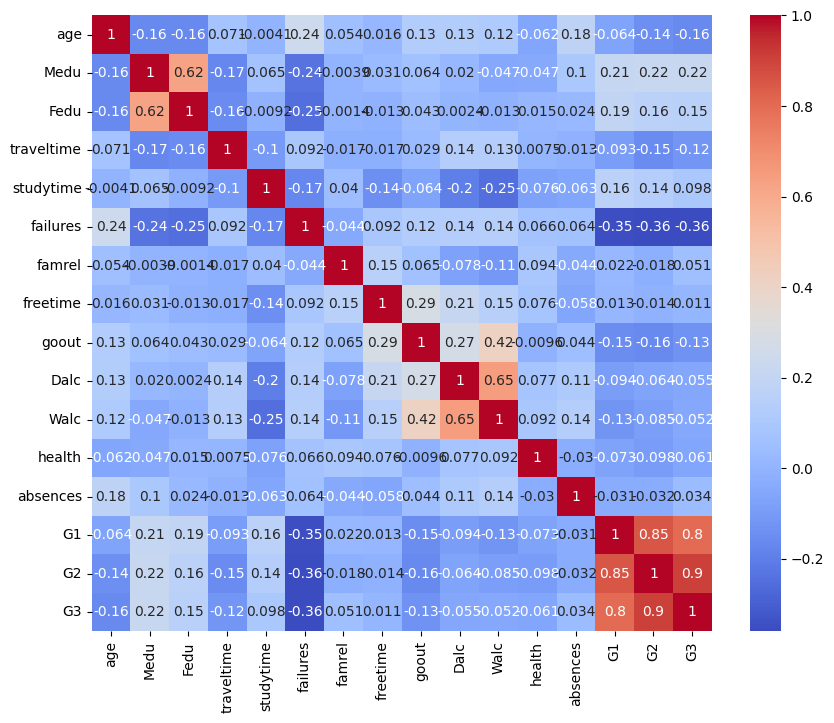

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [8]:
# Create binary target: 1 = Pass (G3 >= 10), 0 = Fail
df['pass'] = (df['G3'] >= 10).astype(int)

# Optional: Drop original grades
df.drop(['G1', 'G2', 'G3'], axis=1, inplace=True)

# Check the new column
df['pass'].value_counts()


pass
1    265
0    130
Name: count, dtype: int64

In [9]:
# Convert categorical features to numeric
df_encoded = pd.get_dummies(df, drop_first=True)

df_encoded.head()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False


In [10]:
from sklearn.model_selection import train_test_split

# Features and target
X = df_encoded.drop('pass', axis=1)
y = df_encoded['pass']

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Decision Tree Accuracy: 0.6455696202531646
              precision    recall  f1-score   support

           0       0.47      0.33      0.39        27
           1       0.70      0.81      0.75        52

    accuracy                           0.65        79
   macro avg       0.59      0.57      0.57        79
weighted avg       0.62      0.65      0.63        79



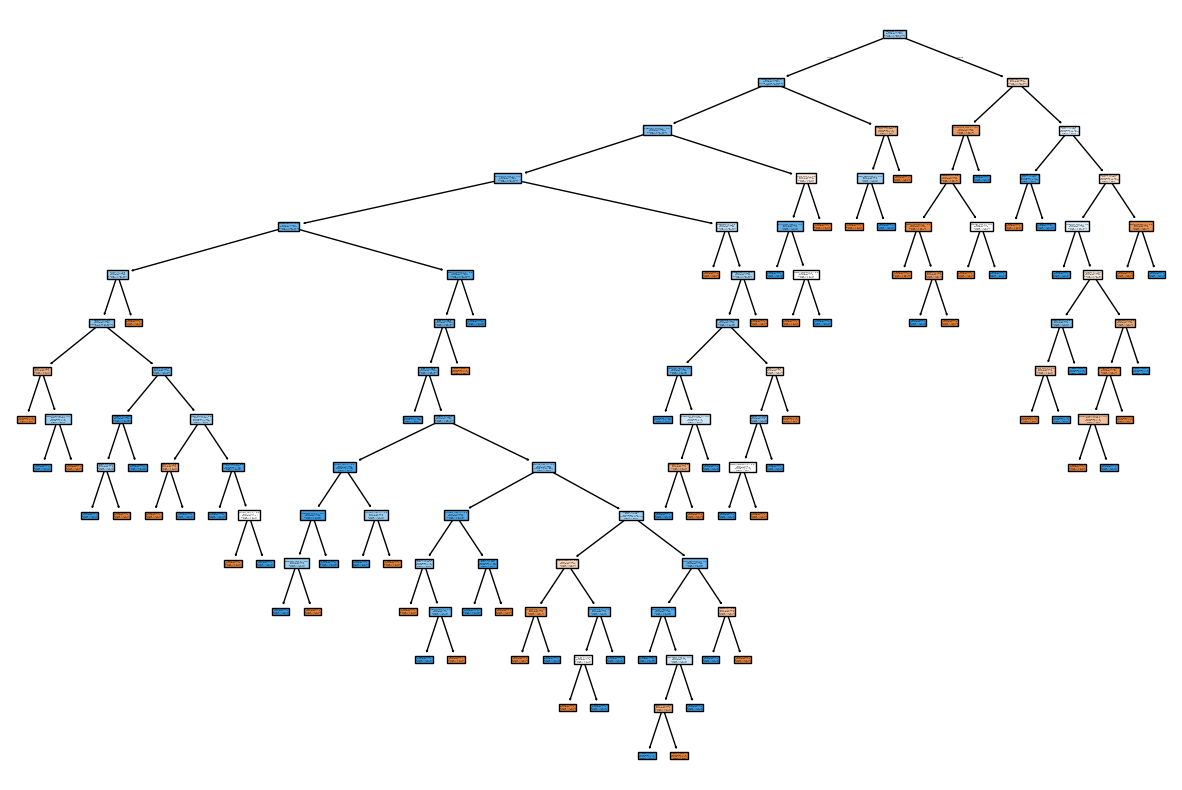

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred = dt.predict(X_test)

# Evaluate
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Plot tree
plt.figure(figsize=(15,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=['Fail','Pass'])
plt.show()


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

# Initialize Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train on training data
rf.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm)


Random Forest Accuracy: 0.6582278481012658
              precision    recall  f1-score   support

           0       0.50      0.19      0.27        27
           1       0.68      0.90      0.78        52

    accuracy                           0.66        79
   macro avg       0.59      0.54      0.52        79
weighted avg       0.62      0.66      0.60        79

Confusion Matrix:
 [[ 5 22]
 [ 5 47]]


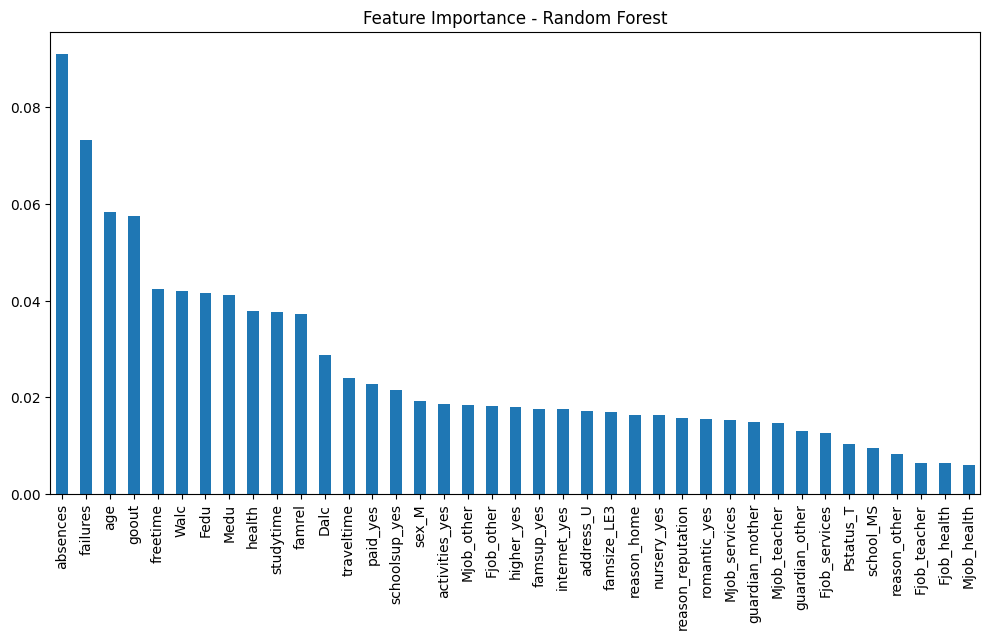

In [13]:
# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False, inplace=True)

# Plot top features
plt.figure(figsize=(12,6))
importances.plot(kind='bar')
plt.title("Feature Importance - Random Forest")
plt.show()
